<h3> Kraig Fernandes </h3>

<h2> Predict the percentage of a student based on the no. of study hours using Linear Regression</h2>

***About the Dataset***

The given dataset has two Columns, one contains no.of study hours and the other one contains the marks scored by him. 

The dataset is located at http://bit.ly/w-data

***Reading the data***

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [9]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***Check if there are any null values present***

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#no null values present

***Visualizing the data***

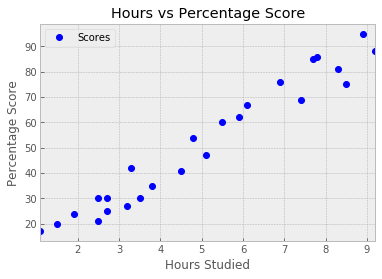

In [32]:
# Plotting the distribution of scores

data.plot(x='Hours',y='Scores',style='bo')

plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.style.use('bmh')
plt.show()

***From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.***

<h3>

***Splitting our data into attributes(input variable) and labels(output variable) as x and y***

In [58]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [45]:
print("Attributes (Hours) : "+str(x))
print()
print("Labels (Scores) : "+str(y))

Attributes (Hours) : [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]

Labels (Scores) : [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


***Splitting our data into training and testing data***

In [46]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

***Training our model***

In [61]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score:  95.15510725211553


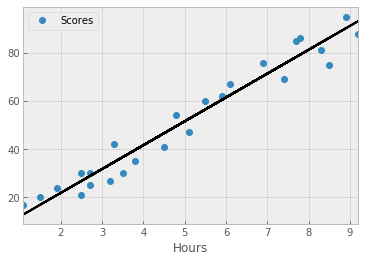

In [80]:
#PLotting the regression line using the eqn, y=mx+c
line=m.coef_*x+m.intercept_
data.plot(x="Hours",y="Scores",style='o')
plt.plot(x,line,color='black')
print("Score: ",m.score(x_train,y_train)*100)

***Comparing Actual Data and Predicated Data***

In [84]:
predicted=m.predict(x_test)

In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***Model Evaluation for Linear Regression***

In [93]:
from sklearn import metrics

In [94]:
#Measuring the average values but won't push large errors
#Mean Absolute Error
print("Mean Absolute Error : ",mean_absolute_error(y_test, predicted))

Mean Absolute Error :  4.183859899002975


In [96]:
#Squaring the difference makes larger errors noted but the units are squared too
#Mean Squared Error 
print("Mean Squared Error ( MSE Value) :",mean_squared_error(y_test, predicted))

Mean Squared Error ( MSE Value) : 21.598769307217406


In [99]:
#Pushes the larger error values and has same units as y
#Root Mean Squared Error 
print("Root Mean Squared Error ( RMSE Value) :",mean_squared_error(y_test, predicted, squared=False))

Root Mean Squared Error ( RMSE Value) : 4.647447612100367


<h2>Predicting the score of student when he studies 9.25 hours per day. </h2>

In [104]:
hours = [[9.25]]
pred = m.predict(hours)
print("Score obtained from 9.25 hours of studying per day = {}".format(pred[0]))

Score obtained from 9.25 hours of studying per day = 93.69173248737535
